In [8]:
import os
import pandas as pd

img_dir = '/home/common/data_v3'
train_csv = '/home/jupyter-nafisha/X-ray-covariates/CSVs/train.csv'
df = pd.read_csv(train_csv)

In [11]:
from torchvision import transforms

def get_train_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485]*3, std=[0.229]*3)
    ])

transforms = get_train_transform()

In [11]:
import torch

def encode_view(orientation):
    # 0: PA, 1: AP, 2: Lateral
    if orientation == "lateral":
        return 2
    if orientation == "PA":
        return 0
    return 1

def encode_sex(sex):
    return 0 if sex == "M" else 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].


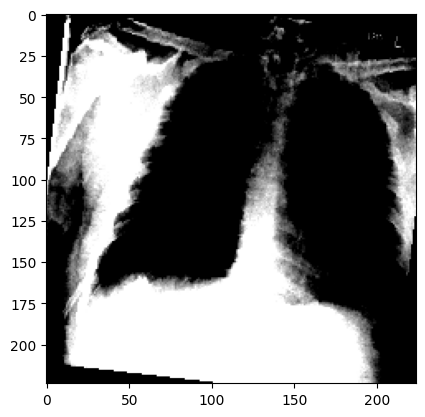

In [45]:
from PIL import Image
import matplotlib.pyplot as plt

row = df.iloc[2]
image_id = row["image_id"]
img_path = os.path.join(img_dir, image_id)
image = Image.open(img_path).convert("RGB")
# plt.imshow(image)

if transforms:
    image = transforms(image)

img = image.permute(1, 2, 0)  # CHW → HWC
img = img.detach().cpu().numpy()
# mean = [0.485, 0.456, 0.406]
# std = [0.229, 0.224, 0.225]
# img = img * std + mean
# img = img.clip(0, 1)
plt.imshow(img)

view = encode_view(row['orientation'])
sex = encode_sex(row['sex'])

view = torch.tensor(view, dtype=torch.long)
sex = torch.tensor(sex, dtype=torch.long)

label = 0 if row['label'] == 'Normal' else 1
label = torch.tensor(label, dtype=torch.float32)

In [46]:
view, sex, label

(tensor(1), tensor(0), tensor(0.))

### pred pipeline

In [182]:
test_dataset = CXRMulitmodalDataset(test_csv, img_dir, transform=get_val_transform())

NameError: name 'CXRMulitmodalDataset' is not defined

In [8]:
import pandas as pd
test_csv = '/home/jupyter-nafisha/X-ray-covariates/CSVs/PADCHEST_selected_with_reports.csv'
img_dir = '/home/jupyter-nafisha/X-ray-covariates/padchest_normalized'

# test_csv = '/home/jupyter-nafisha/X-ray-covariates/CSVs/test.csv'
# img_dir = '/home/common/data_v3'

df = pd.read_csv(test_csv)

In [9]:
from torchvision import transforms

def get_val_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485]*3, std=[0.229]*3)
        transforms.Normalize(mean=[0.502]*3, std=[0.284]*3)
        
    ])

transforms = get_val_transform()

# Mean: 0.502072, Std: 0.284383

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7676055..1.6154377].


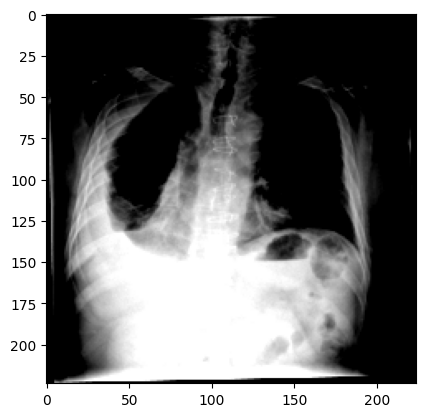

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

row = df.iloc[4]
image_id = row["image_id"]
img_path = os.path.join(img_dir, image_id)
# print(os.path.exists(img_path))
# print(img_path)
image = Image.open(img_path).convert("RGB")
plt.imshow(image)

if transforms:
    image = transforms(image)

img = image.permute(1, 2, 0)  # CHW → HWC
img = img.detach().cpu().numpy()
# mean = [0.485, 0.456, 0.406]
# std = [0.229, 0.224, 0.225]
# img = img * std + mean
# img = img.clip(0, 1)
plt.imshow(img)

view = encode_view(row['orientation'])
sex = encode_sex(row['sex'])

view = torch.tensor(view, dtype=torch.long)
sex = torch.tensor(sex, dtype=torch.long)

label = 0 if row['label'] == 'Normal' else 1
label = torch.tensor(label, dtype=torch.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8548386..0.24446556].


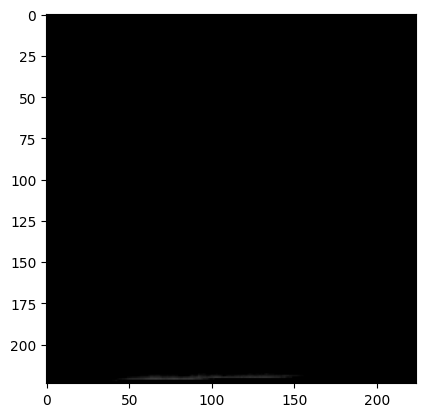

In [202]:
from PIL import Image
import matplotlib.pyplot as plt

row = df.iloc[4]
image_id = row["image_id"]
img_path = os.path.join(img_dir, image_id)
# print(os.path.exists(img_path))
# print(img_path)
image = Image.open(img_path).convert("RGB")
# plt.imshow(image)

if transforms:
    image = transforms(image)

img = image.permute(1, 2, 0)  # CHW → HWC
img = img.detach().cpu().numpy()
# mean = [0.485, 0.456, 0.406]
# std = [0.229, 0.224, 0.225]
# img = img * std + mean
# img = img.clip(0, 1)
plt.imshow(img)

view = encode_view(row['orientation'])
sex = encode_sex(row['sex'])

view = torch.tensor(view, dtype=torch.long)
sex = torch.tensor(sex, dtype=torch.long)

label = 0 if row['label'] == 'Normal' else 1
label = torch.tensor(label, dtype=torch.float32)

Min intensity: 16
Max intensity: 255
Shape: (3296, 3236, 3)
Dtype: uint8


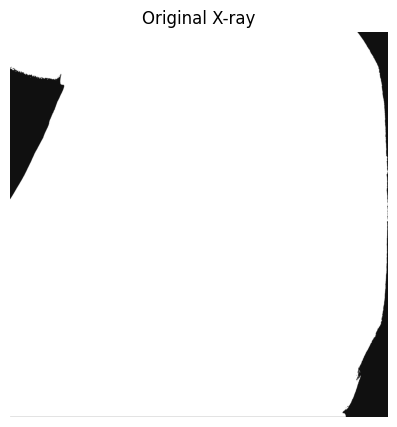

In [165]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_path = "/home/jupyter-nafisha/X-ray-covariates/135803415504923515076821959678074435083_fzis7d.jpg"

# Read as grayscale (X-rays should be grayscale)
img = Image.open(img_path).convert("RGB")

# Convert to NumPy
img_np = np.array(img)

# Print intensity statisticRGB
print("Min intensity:", img_np.min())
print("Max intensity:", img_np.max())
print("Shape:", img_np.shape)
print("Dtype:", img_np.dtype)

# Plot
plt.figure(figsize=(5, 5))
plt.imshow(img_np, cmap="gray")
plt.axis("off")
plt.title("Original X-ray")
plt.show()


In [135]:
from PIL import Image

# chexpert
# img_path = "/home/jupyter-nafisha/X-ray/Inference_data/Chexpert/patient00039/patient00019/study2/view1_frontal.jpg"

# vinbig
# img_path = "/home/common/data_v3/vinbig/52fe2f01573413223b1f7edee17de341.jpg"

# padchest
img_path = "/home/jupyter-nafisha/X-ray-covariates/135803415504923515076821959678074435083_fzis7d.jpg"

img = Image.open(img_path)
print(img.mode)   # "L", "RGB", or "RGBA"

I;16


### 32-bit signed integer image, stored as 16-bit data

In [170]:
import numpy as np
from PIL import Image

img_path = "/home/jupyter-nafisha/X-ray-covariates/135803415504923515076821959678074435083_fzis7d.jpg"

image = Image.open(img_path)     # mode = I;16

# Convert to numpy
img_np = np.array(image).astype(np.float32)
print(img_np.min(), img_np.max())

# Min–max normalize to 0–255
img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-8)
img_np = (img_np * 255.0).astype(np.uint8)

# Back to PIL grayscale
image = Image.fromarray(img_np, mode="L")
# image.save("/home/jupyter-nafisha/X-ray-covariates/temp.jpg")

# Replicate to 3 channels
# image = Image.merge("RGB", (image, image, image))

16.0 60719.0


In [169]:
test_csv = '/home/jupyter-nafisha/X-ray-covariates/CSVs/PADCHEST_selected_with_reports.csv'
img_dir = '/home/jupyter-nafisha/X-ray-covariates/padchest_testing'
dest_dir = '/home/jupyter-nafisha/X-ray-covariates/padchest_normalized'

data = pd.read_csv(test_csv)

for _, row in data.iterrows():
    img_path= os.path.join(img_dir, row['image_id'])
    image = Image.open(img_path)
    img_np = np.array(image).astype(np.float32)

    # Min–max normalize to 0–255
    img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-8)
    img_np = (img_np * 255.0).astype(np.uint8)

    # print(img_np.min(), img_np.max())
    
    # Back to PIL grayscale
    image = Image.fromarray(img_np, mode="L")
    dest_path = os.path.join(dest_dir, row['image_id'])
    image.save(dest_path)
    # break

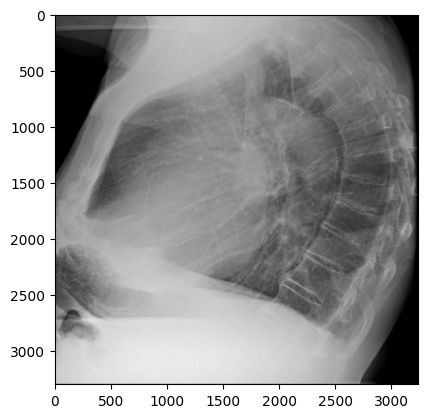

In [131]:
plt.imshow(image)

(-0.5, 3235.5, 3295.5, -0.5)

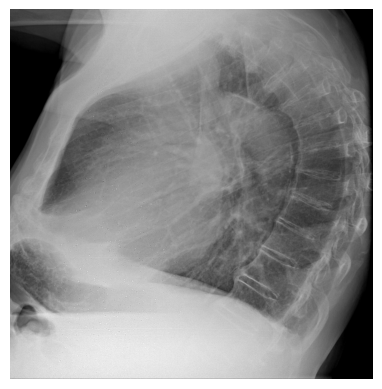

In [141]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/home/jupyter-nafisha/X-ray-covariates/temp.jpg"

image = Image.open(img_path).convert("RGB")

plt.imshow(image)
plt.axis("off")

In [86]:
import torch
from torchvision.models import densenet121, DenseNet121_Weights

# Load DenseNet-121 with ImageNet pretrained weights
weights = DenseNet121_Weights.IMAGENET1K_V1
model = densenet121(weights=weights)

# Set to evaluation mode (important for inference)
model.eval()


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [102]:
import torch
x = torch.rand(1, 3, 128, 128)
out = model(x)

In [104]:
out.shape

torch.Size([1, 1000])

# Stats

In [1]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [2]:
class GrayscaleImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx]['image_id'])
        img = Image.open(img_path).convert('L')  # force grayscale

        if self.transform:
            img = self.transform(img)

        return img


In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # IMPORTANT: same as training
    transforms.ToTensor()            # gives [1, H, W]
])


In [4]:
img_dir = '/home/common/data_v3'
test_csv = '/home/jupyter-nafisha/X-ray-covariates/CSVs/train.csv'

In [5]:
dataset = GrayscaleImageDataset(
    csv_file=test_csv,
    img_dir=img_dir,
    transform=transform
)

loader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

In [6]:
def compute_mean_std(loader):
    n_pixels = 0
    mean = 0.0
    var = 0.0

    for imgs in loader:
        # imgs shape: [B, 1, H, W]
        b, c, h, w = imgs.shape
        imgs = imgs.view(b, -1)  # [B, H*W]

        n_pixels += imgs.numel()
        mean += imgs.sum().item()
        var += (imgs ** 2).sum().item()

    mean /= n_pixels
    std = (var / n_pixels - mean ** 2) ** 0.5

    return mean, std


In [7]:
mean, std = compute_mean_std(loader)
print(f"Mean: {mean:.6f}, Std: {std:.6f}")

Mean: 0.502072, Std: 0.284383


In [180]:
n_pixels = 0
mean = 0.0
var = 0.0

for imgs in loader:
    # imgs shape: [B, 1, H, W]
    b, c, h, w = imgs.shape
    
    imgs = imgs.view(b, -1)  # [B, H*W]
    # print(imgs.shape)

    n_pixels += imgs.numel()
    mean += imgs.sum().item()
    var += (imgs ** 2).sum().item()
    # break

mean /= n_pixels
std = (var / n_pixels - mean ** 2) ** 0.5

# # return mean, std
# break

In [181]:
mean, std

(0.8847563487094533, 0.30965158835171486)